### **Proyecto I- Parte IV (Core)**

**Análisis y Predicción de Ventas en una Tienda de Retail**

![Descripción del gráfico](../imagen/GitHub.JPG)


**Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización**

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

**Instrucciones**

Continuar desde la Parte III
 
Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.

**Análisis Descriptivo y Visualización**

Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Especificar la ruta completa del archivo CSV
file_path = '../data/retail_sales.csv'

# Cargar el archivo retail_sales.csv en un DataFrame
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas del DataFrame para confirmar que se ha cargado correctamente
print("Primeras 5 filas del DataFrame:")
print(df.head())

Primeras 5 filas del DataFrame:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [7]:
# Ver datos nulos
df.isnull().sum(axis=0)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [10]:
# Análisis de género
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Análisis de categorías de productos
product_category_counts = df['Product Category'].value_counts()
print(product_category_counts)

Gender
Female    510
Male      490
Name: count, dtype: int64
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


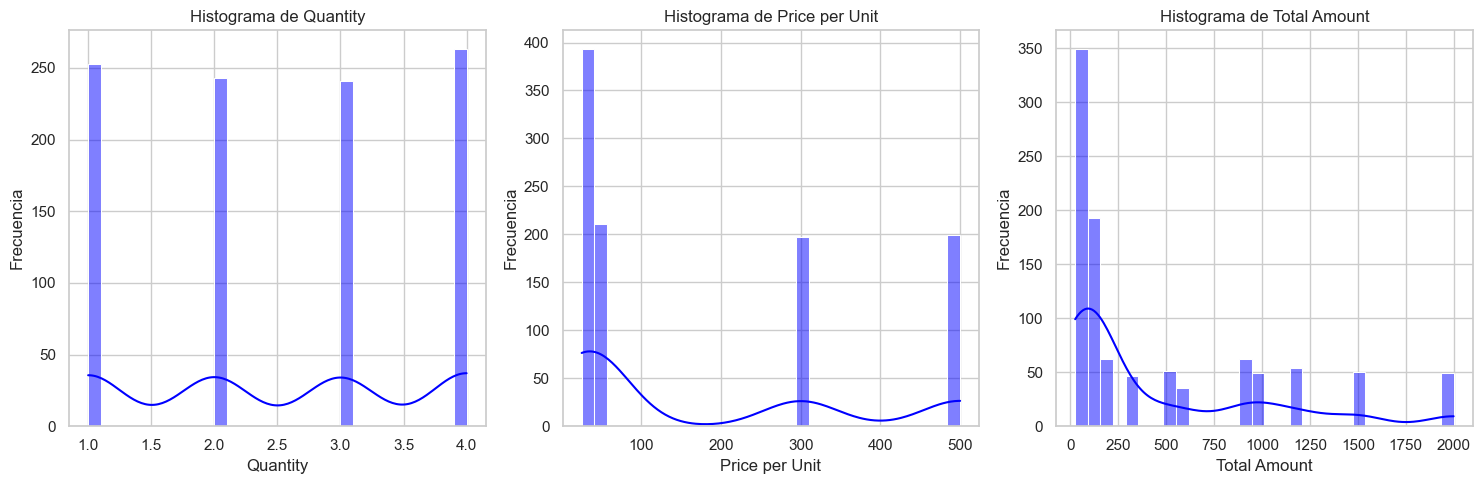

In [11]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de histogramas para las variables numéricas
numerical_columns = ['Quantity', 'Price per Unit', 'Total Amount']

plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


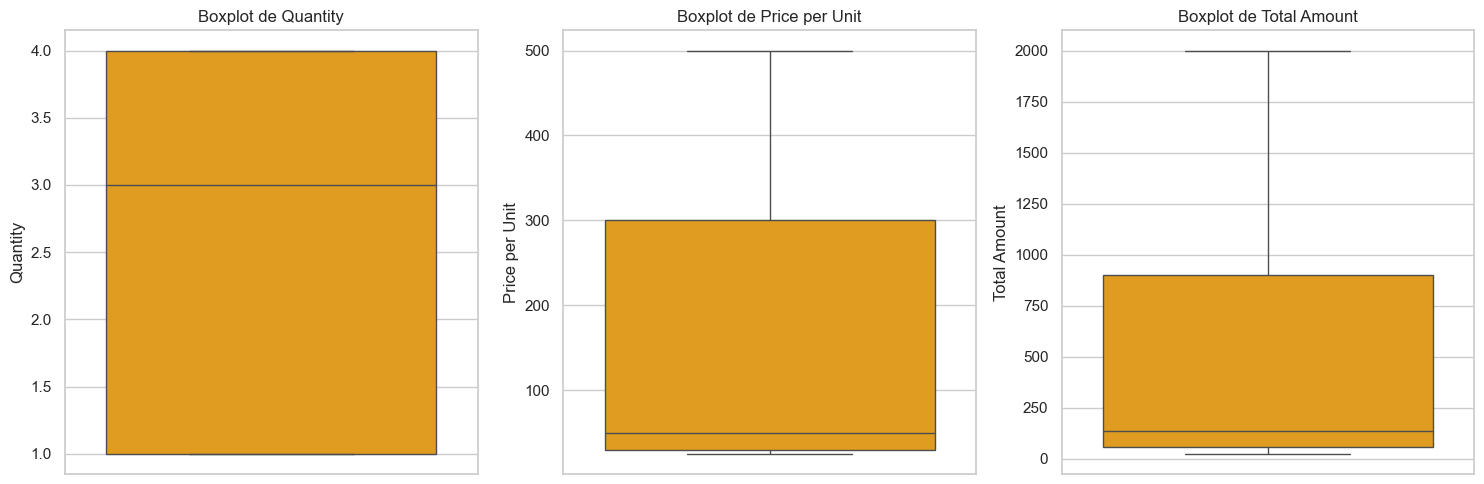

In [12]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=column, color='orange')
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [13]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por fecha y calcular el total de ventas
df['Total Amount'] = df['Total Amount'].astype(float)  # Asegúrate de que sea tipo float
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

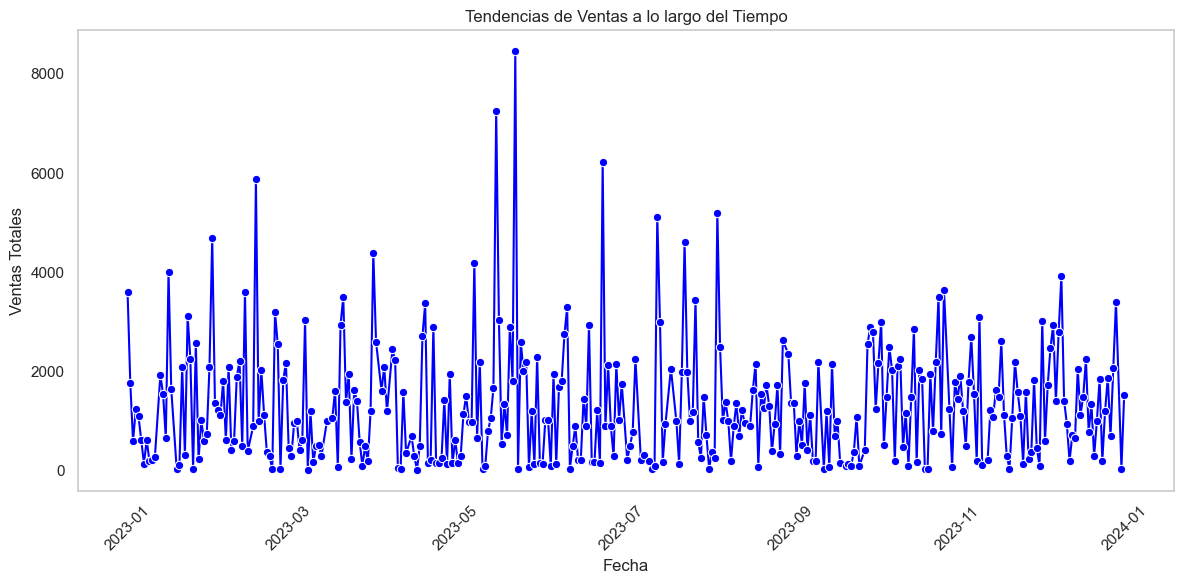

In [14]:
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas
sns.lineplot(data=daily_sales, x='Date', y='Total Amount', marker='o', color='blue')

# Configurar el gráfico
plt.title('Tendencias de Ventas a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


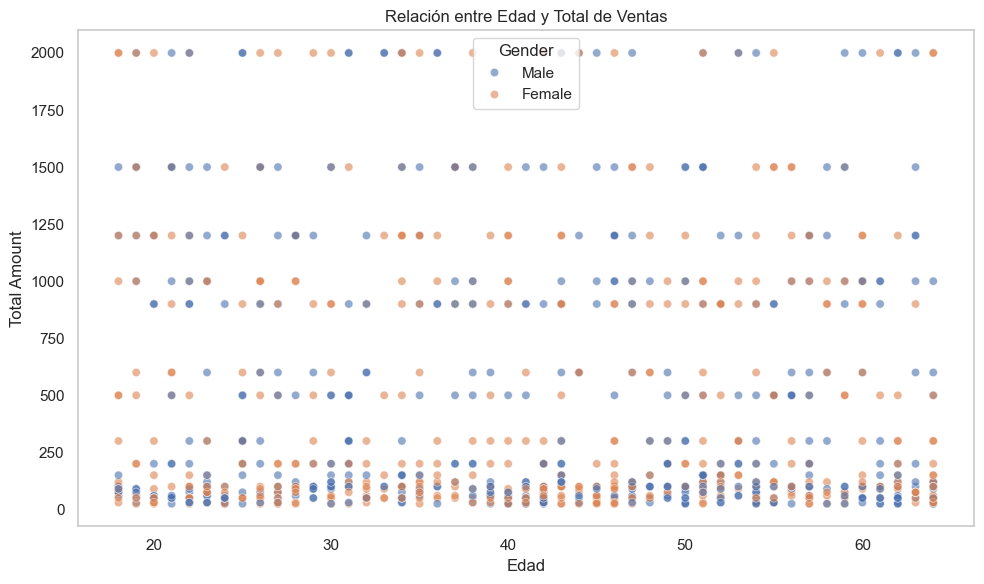

In [15]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Gender', alpha=0.6)

# Configurar el gráfico
plt.title('Relación entre Edad y Total de Ventas')
plt.xlabel('Edad')
plt.ylabel('Total Amount')
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


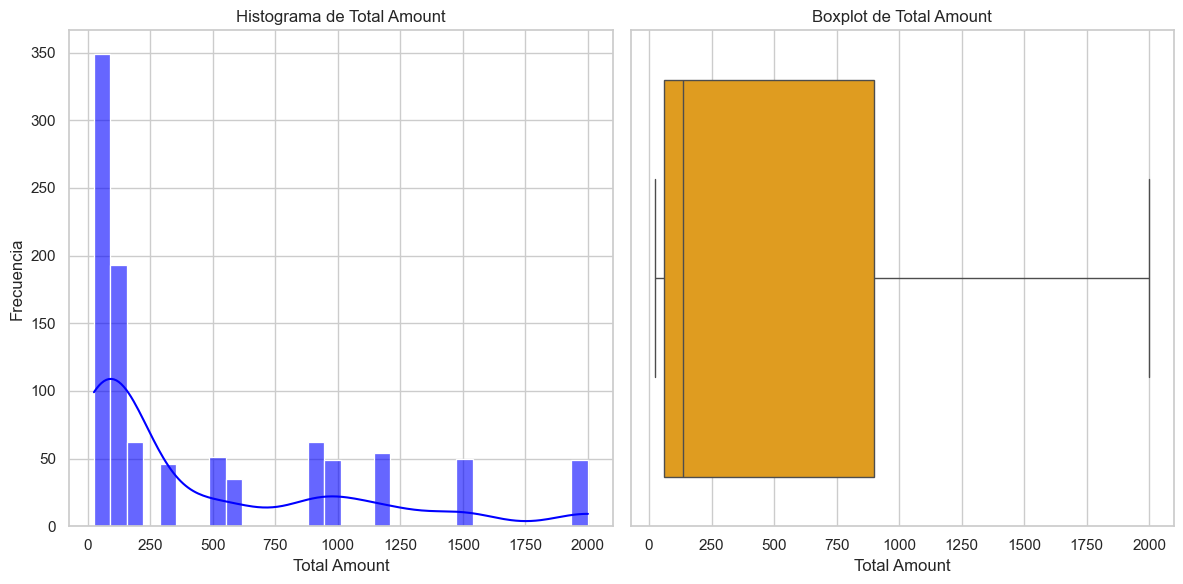

In [16]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el histograma
plt.subplot(1, 2, 1)
sns.histplot(df['Total Amount'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Histograma de Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frecuencia')

# Crear el boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total Amount'], color='orange')
plt.title('Boxplot de Total Amount')
plt.xlabel('Total Amount')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
